# Exploring Listings Over a Year

#### We were curious to see how a listing's price might change over the course over the year, particularly on holidays. The following explorations helped us come to the very intuitive conclusion that listings change their prices primarily on weekends and holidays! 

In [1]:
import numpy as np
from scipy import sparse
import re
import matplotlib
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.cross_validation import train_test_split as sk_split
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import datetime as dt
import math
%matplotlib inline
from sklearn.linear_model import Lasso as Lasso_Reg
from ipywidgets import interact,  FloatSlider, RadioButtons
import numpy as np 
import sklearn.preprocessing as Preprocessing
from sklearn.preprocessing import StandardScaler as Standardize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# open calendar dataset 
calendar = pd.read_csv('calendar_revised.csv')
calendar = calendar.drop('Unnamed: 0', 1)

In [3]:
calendar.head()

,listing,date,available,price
0,3604481,2015-01-01,t,600.0
1,3604481,2015-01-02,t,600.0
2,3604481,2015-01-03,t,600.0
3,3604481,2015-01-04,t,600.0
4,3604481,2015-01-05,t,600.0


### Price Spikes 

We explored a portion of the dataset (the full dataset was too costly to run on our computers for certain tasks) to determine which months of the year the most price spikes occured. We created a function that compared a listing's price each day of the year, and documented the day of the year in which the listing had its highest price spike.

In [4]:
# empty dataframe 
demand_dates = pd.DataFrame(columns=['Differences', 'Date'])

# compare prices over course of a year for unique id 
def difference(unique_id):
    temp = calendar[calendar['listing']==unique_id]
    # find mean price of that listing
    average = temp['price'].mean()
    # compare each day of the year's price to average 
    temp['differences'] = average - temp['price']
    # sort values 
    temp = temp.sort_values('differences', ascending=False)
    # document day and largest price spike of the listing in the demand_dates dataframe 
    if temp.iloc[0, 4] > 0: 
        demand_dates.loc[len(demand_dates)] = [temp.iloc[0,4], temp.iloc[0,1]]

In [5]:
# run the function on each unique id 
unique = calendar['listing'].unique()
for i in range(len(unique)/26):
    difference(unique[i])

/Users/Mirai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
# convert to a workable format 
demand_dates['Date'] = pd.to_datetime(demand_dates['Date'])

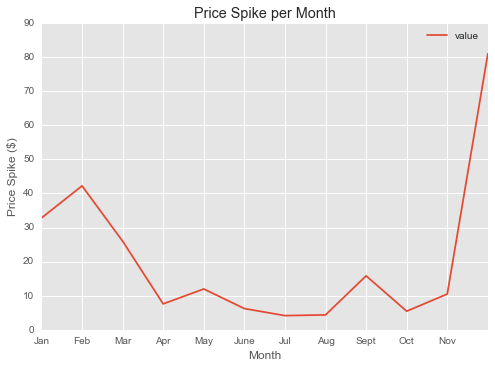

In [50]:
# Plot the average price spike per month (in dollars) 
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 1))
ax.set_xlabel('Month')
ax.set_ylabel('Price Spike ($)')
ax.set_title('Price Spike per Month')


From this visualization, we see that certain months in which the price spikes are the highest (in dollars) are January, February, and December. We hypothesized this might be due to New Year's Valentine's Day and Christmas/New Year's Eve respectively. 

### Average Price Over a Year

In [39]:
# unique dates in calendar dataset 
unique_days = calendar['date'].unique()

# find the average price on every day
for i in range(len(unique_days)):
    temp = calendar['price'][calendar['date'] == unique_days[i]]
    average_per_day.append(temp.mean())

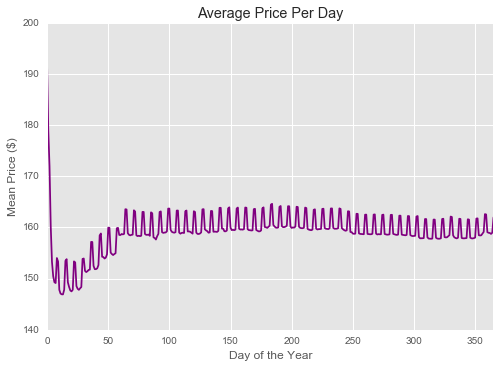

In [46]:
plt.plot(range(len(unique_days)), average_per_day, color = 'purple')
plt.style.use('ggplot')
plt.xlim(0, 365)
plt.title('Average Price Per Day')
plt.xlabel('Day of the Year')
plt.ylabel('Mean Price ($)')


There are 3 notable results from this visualization: 

1) There are spikes every few days, which must represent weekends.

2) There is a deep in average prices in the cold months of the year in New York. 

3) There is a tremendous spike in price at the very beginning of the year -- this represents New Year's. New York, of course, is very popular on New Year's because of the ball drop. 

### Understanding Demand

We were curious to look into a few months which we believed had important holidays. We wanted to determine whether certain dates were more popular days for raising prices. This would thus imply that there is higher demand on those days, and thus owners increase their price in response to that demand. 

In [134]:
# separate dataframes for months with important holidays 
demand_dates['months'] = demand_dates.Date.dt.month
m1 = demand_dates[demand_dates['months'] == 1]
m2 = demand_dates[demand_dates['months'] == 2]
m7 = demand_dates[demand_dates['months'] == 7]
m12 = demand_dates[demand_dates['months'] == 12]

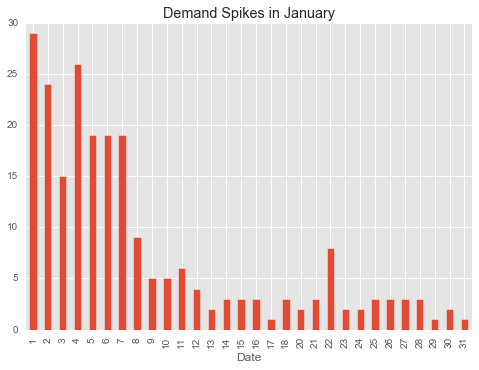

In [137]:
# January 
m1['Date'].groupby(m1.Date.dt.day).count().plot(kind='bar',title='Demand Spikes in January', label='Jan')

The bar plot shows the date and the number of listings that increased their prices on that date. Many listings seem to increase their prices on New Years and in the week after New Years.

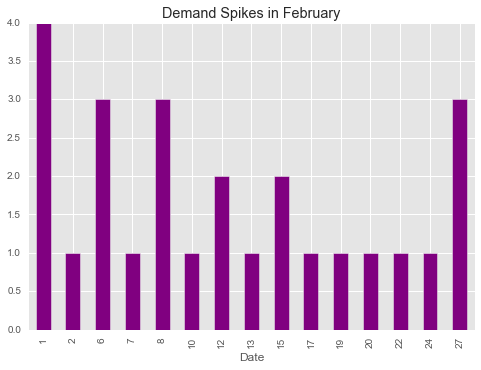

In [138]:
# February
m2['Date'].groupby(m2.Date.dt.day).count().plot(kind='bar', color='purple', title='Demand Spikes in February', label='Feb')

February has no notable spikes in demand, despite our initial hypothesis about Valentine's Day

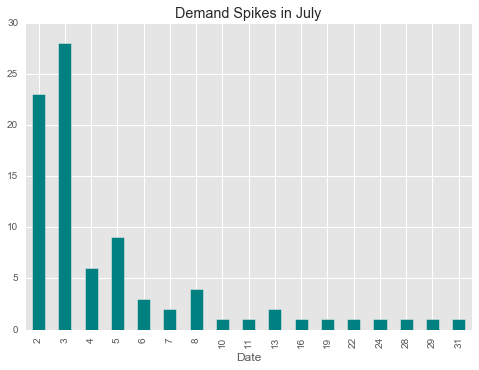

In [139]:
# July
m7['Date'].groupby(m7.Date.dt.day).count().plot(kind='bar', color='teal', title='Demand Spikes in July')

In the days preceding July 4th, there is a large increase in demand; we were surprised that less people seemed to increase their prices on July 4th itself however. 

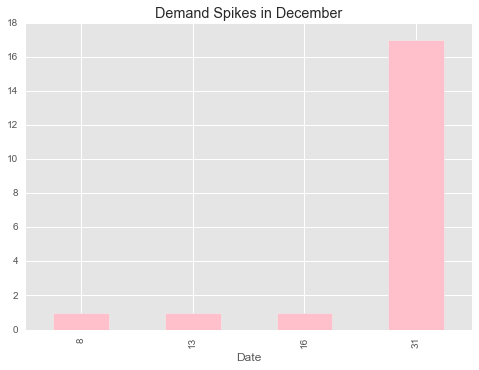

In [142]:
# December
m12['Date'].groupby(m12.Date.dt.day).count().plot(kind='bar', color='pink', title='Demand Spikes in December')

We found that December 31st had a clear demand spike! Nevertheless, we were surprised that Christmas was not a day when people increase their prices. However, we must account for the fact that we did not use the entire dataset in creating these graphs, because of the computational memory/complexity it required.

### Holiday Analysis

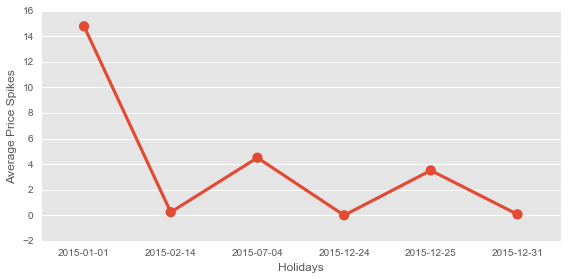

In [143]:
# main holidays 
unique_dates = ['2015-01-01', '2015-02-14', '2015-07-04', '2015-12-24', '2015-12-25', '2015-12-31']
unique_id = calendar['listing'].unique()

# empty arrays 
new_years = []
valentines = []
july_fourth = []
christ_eve = []
christmas = []
new_years_eve = []
holidays = [new_years, valentines, july_fourth, christ_eve, christmas, new_years_eve]

# find average price spike for each holiday
# add results to the empty arrays 

for i in range(len(unique_id)):
    # temp dataframe for each listing
    temp = calendar[calendar['listing'] == unique_id[i]]
    # find the mean price
    average = temp['price'].mean()
    # compare average price to holiday price
    for j in range(len(holidays)):
        temp_1 = temp['price'][temp['date'] == unique_dates[j]]
        # document the price spike in the array
        if len(temp_1) > 0:
            num = temp_1.iloc[0] - average
            holidays[j].append(num)

# calculate average of all the price spikes for each holiday
averages = []
for i in range(len(unique_dates)):
    averages.append(sum(holidays[i])/len(holidays[i]))
# plot
data = pd.DataFrame(columns = ['Average Price Spikes', 'Holidays'])
data['Average Price Spikes'] = averages
data['Holidays'] = unique_dates


ax = sns.factorplot(data = data, x = 'Holidays', y = 'Average Price Spikes', size=4, aspect=2)  
ax.set_titles('Price Spikes per Holiday')

This final exploratory graph demonstrates, once again, how New year's has the largest average price spike. July 4th and Christmas also have notable price spikes. We will include indicator variables in our final dataset for these two holidays. Additionally, because previous explorations demonstrated the New Year's Eve is an important holiday as well, we will include an indicator variable for listings that change their price on this date as well. However,time and time again we see that Valentine's Day is not an important holiday in which Airbnb prices change and so we will not include an indicator variable for this date.